In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import sys
import os
import json
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

sys.path.append(os.path.abspath('../'))
from data import Data

path_to_data="/home/akhazi/Dropbox/University College London/MSc/Dissertation/Datasets/data/"
path_to_data_win="C:/Users/Adam Khazi/Dropbox/University College London/MSc/Dissertation/Datasets/data/"

In [14]:
with open(path_to_data_win + "mpd.slice.0-999.json") as f:
    data = json.load(f)

In [35]:
d = Data()
playlistData = d.load(100)

In [17]:
type(playlistData)

list

In [28]:
data['info']

{'generated_on': '2017-12-03 08:41:42.057563',
 'slice': '0-999',
 'version': 'v1'}

## Track Lengths

In [35]:
playlist_dist = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["num_tracks"] not in playlist_dist:
            playlist_dist[playlist["num_tracks"]] = 1
        else:
            playlist_dist[playlist["num_tracks"]]+=1

In [36]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_tracks=[t[0] for t in playlist_tuples]
playlist_nr_nr_tracks=[t[1] for t in playlist_tuples]

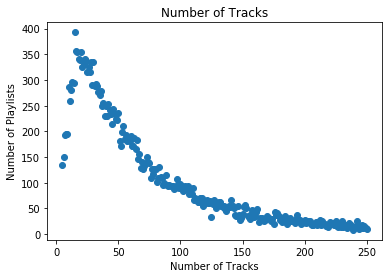

In [181]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(playlist_nr_tracks, playlist_nr_nr_tracks)
plt.title('Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits

In [38]:
playlist_dist = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["num_edits"] not in playlist_dist:
            playlist_dist[playlist["num_edits"]] = 1
        else:
            playlist_dist[playlist["num_edits"]] += 1

In [39]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits=[t[1] for t in playlist_tuples]

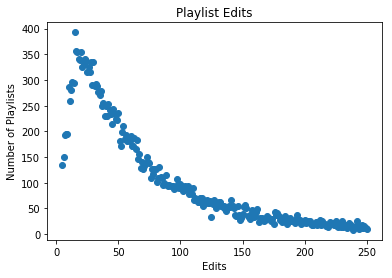

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(playlist_nr_tracks, playlist_nr_nr_tracks)
plt.title('Playlist Edits')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits (checking collaboration)

In [41]:
playlist_dist_collab_on = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["collaborative"] == 'true':
            if playlist["num_edits"] not in playlist_dist_collab_on:
                playlist_dist_collab_on[playlist["num_edits"]] = 1
            else:
                playlist_dist_collab_on[playlist["num_edits"]] += 1

In [42]:
playlist_dist_collab_off = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["collaborative"] == 'false':
            if playlist["num_edits"] not in playlist_dist_collab_off:
                playlist_dist_collab_off[playlist["num_edits"]] = 1
            else:
                playlist_dist_collab_off[playlist["num_edits"]] += 1

In [43]:
playlist_tuples = list(playlist_dist_collab_on.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_on=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_on=[t[1] for t in playlist_tuples]

In [44]:
playlist_tuples = list(playlist_dist_collab_off.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_off=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_off=[t[1] for t in playlist_tuples]

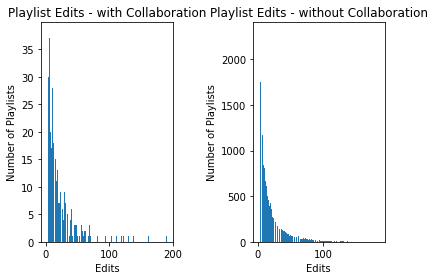

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,2,1)
ax.bar(playlist_nr_edits_on, height=playlist_nr_nr_edits_on)
plt.title('Playlist Edits - with Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

ax = fig.add_subplot(1,2,2)
ax.bar(playlist_nr_edits_off, height=playlist_nr_nr_edits_off)
plt.title('Playlist Edits - without Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

plt.tight_layout()
plt.show()

## Duration of Playlists

In [46]:
playlist_len_ms = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        playlist_len_ms.append(playlist['duration_ms'])

In [47]:
playlist_len_ms.sort()

In [48]:
playlist_len_ms
playlist_len_mins = [(x / 100)/60 for x in playlist_len_ms] # in mins

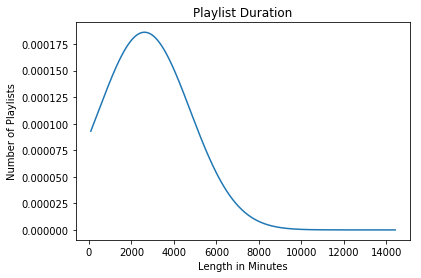

In [49]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

hmean = np.mean(playlist_len_mins)
hstd = np.std(playlist_len_mins)
pdf = stats.norm.pdf(playlist_len_mins, hmean, hstd)
plt.title('Playlist Duration')
plt.xlabel('Length in Minutes')
plt.ylabel('Number of Playlists')

plt.plot(playlist_len_mins, pdf) # including h here is crucial

## Artists

In [165]:
nr_artists = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        nr_artists.append(playlist['num_artists'])

In [166]:
nr_artists.sort()

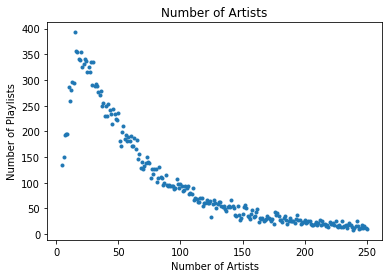

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(playlist_nr_tracks, playlist_nr_nr_tracks, marker='.')
plt.title('Number of Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Playlists')
plt.show()

## Artists vs. Tracks

In [171]:
artists_v_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        artists_v_tracks.append((playlist['num_artists'], playlist['num_tracks']))

In [172]:
artists_v_tracks.sort(key=lambda tup: tup[1]) # sort by nr of tracks per playlist

In [173]:
nr_artists=[t[0] for t in artists_v_tracks]
nr_tracks=[t[1] for t in artists_v_tracks]

In [178]:
nr_artists_avg = movingaverage(nr_artists, 500)

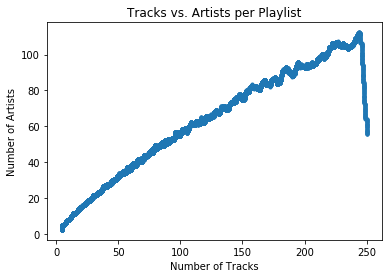

In [179]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nr_tracks, nr_artists_avg, marker='.')
plt.title('Tracks vs. Artists per Playlist')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Artists')
plt.show()

## Artists vs. Albums

In [70]:
artists_v_albums = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        artists_v_albums.append((playlist['num_artists'], playlist['num_albums']))

In [71]:
artists_v_albums.sort(key=lambda tup: tup[0]) # sort by nr of artists per playlist

In [72]:
nr_artists=[t[0] for t in artists_v_albums]
nr_albums=[t[1] for t in artists_v_albums]

In [14]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [89]:
nr_albums_av = movingaverage(nr_albums, 400)

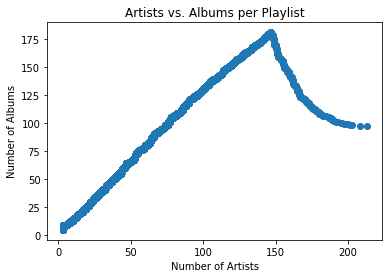

In [94]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nr_artists, nr_albums_av)
plt.title('Artists vs. Albums per Playlist')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Albums (Average)')
plt.show()

## Last Modified Time (Month) vs. Number of Tracks

In [111]:
from datetime import datetime

In [112]:
time_v_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        time_v_tracks.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%m')), playlist['num_tracks']))

In [ ]:
time_v_tracks.sort(key=lambda tup: tup[0]) # sort by month

In [115]:
months = [i for i in range(1, 13)]
monthly_avg = []
for i in range(1, 13):
    total=0
    nr=0
    for tvt in time_v_tracks:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    monthly_avg.append(total/nr) 

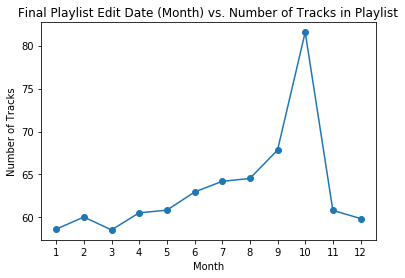

In [149]:
plt.plot(months, monthly_avg, '-o')
plt.title('Final Playlist Edit Date (Month) vs. Number of Tracks in Playlist')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('Number of Tracks')
plt.show()

## Last Modified Time (Year) vs. Number of Tracks

In [156]:
time_v_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        time_v_tracks.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%Y')), playlist['num_tracks']))

In [161]:
years=[t[0] for t in time_v_tracks]
set(years)

{2011, 2012, 2013, 2014, 2015, 2016, 2017}

In [163]:
years = [i for i in range(2011, 2018)]
yearly_avg = []
for i in range(2011, 2018):
    total=0
    nr=0
    for tvt in time_v_tracks:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    yearly_avg.append(total/nr) 

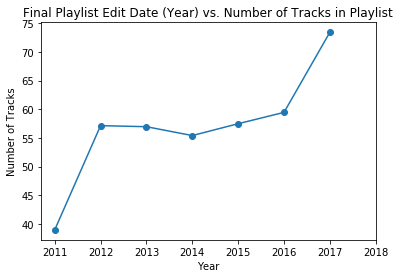

In [164]:
plt.plot(years, yearly_avg, '-o')
plt.title('Final Playlist Edit Date (Year) vs. Number of Tracks in Playlist')
plt.xlabel('Year')
plt.xticks(np.arange(2011, 2019, 1.0))
plt.ylabel('Number of Tracks')
plt.show()

## Followers vs. Number of Tracks

In [37]:
followers_v_nr_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_nr_tracks.append((playlist['num_tracks'], playlist['num_followers']))

In [38]:
followers_v_nr_tracks.sort(key=lambda tup: tup[0]) # sort by nr tracks

In [39]:
nr_tracks=[t[0] for t in followers_v_nr_tracks]
nr_followers=[t[1] for t in followers_v_nr_tracks]

In [48]:
from math import log
nr_followers_av = movingaverage(nr_followers, 3000)

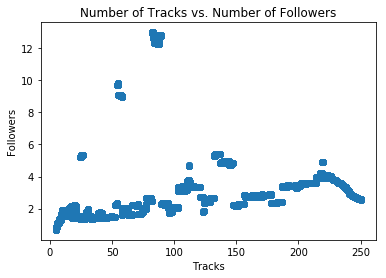

In [49]:
plt.plot(nr_tracks, nr_followers_av, 'o')
plt.title('Number of Tracks vs. Number of Followers')
plt.xlabel('Tracks')
plt.ylabel('Followers')
plt.show()